## Customer Segmentation

dividing the customers into several groups based on their credit card activities to be able make propogandas by the company

Steps - 
<OL>
    <li>Understand the Problem statement
    <li>Understand the Data
    <li>Pre processing, normalization
    <li>PCA
    <li>Clustering 
    <li>Prediction
</OL>

Clustering techniques can be used in - 
<UL>
    <li> marketing - owners can make different discounts, offers for customer groups
    <li>Real Estate
</UL>       

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
cc_df = pd.read_csv("./Datasets/CC General.csv")
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
cc_df.shape

(8950, 18)

In [4]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
#since MINIMUM_PAYMENTS is having null values we have fill up those values
#so we fill the c=values using the mean of MINIMUM Value

cc_df.loc[(cc_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].mean()
cc_df.loc[(cc_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = cc_df['CREDIT_LIMIT'].mean()

cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
cc_df.duplicated().sum()

0

In [10]:
cc_df.drop('CUST_ID',axis = 1, inplace = True)

In [12]:
n = len(cc_df.columns)
n

17

In [13]:
cc_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

############################################################

Dist Plot combines matplotlib's hist() with seaborn kdeplot()

KDE Plor represents the kernel Density Estimate

KSE isused for visualizing the Probability Density of a continuous variable.

KDE demonstrate the probablity density at different values in a continuous variable

############################################################

c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\harshit\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

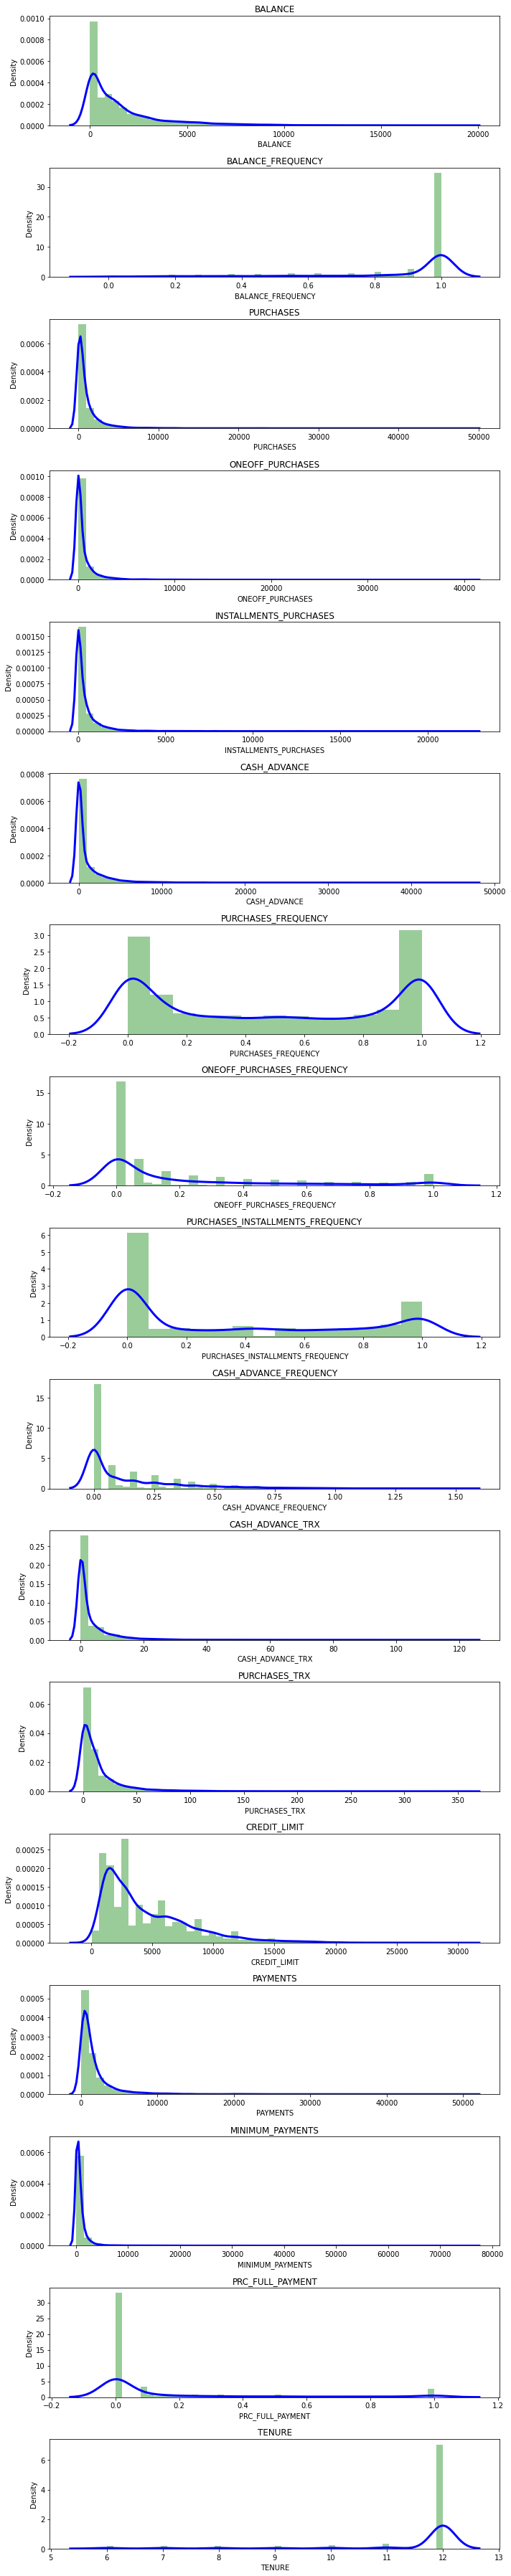

In [15]:
plt.figure(figsize=(10, 50))

for i in range(n):
    plt.subplot(17, 1, i+1)
    sns.distplot(cc_df[cc_df.columns[i]], kde_kws={"color":"b", "lw": 3, "label":"KDE"}, hist_kws={"color":"g"})
    plt.title(cc_df.columns[i])
    
plt.tight_layout()

## Find the number of Optimal number of clusters using Elbow Method

In [16]:
#lets Scale the data first

scaler = StandardScaler()
cc_df_scaled = scaler.fit_transform(cc_df)

cc_df_scaled.shape

(8950, 17)

In [17]:
#Do it youeself

# Task 7 Apply K means

In [19]:
kmeans = KMeans(8)
kmeans.fit(cc_df_scaled)
labels = kmeans.labels_

In [21]:
kmeans.cluster_centers_.shape

(8, 17)

In [22]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [cc_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.399682,0.306315,-0.061225,-0.256075,0.325643,-0.362239,0.982168,-0.409931,1.175849,-0.461102,-0.357120,0.137094,-0.321782,-0.243465,-0.108416,0.360877,-0.029877
1,1.566853,0.371828,-0.231351,-0.164187,-0.245456,1.941202,-0.482218,-0.212149,-0.428855,1.908753,1.844543,-0.279771,0.955189,0.735608,0.343865,-0.391592,-0.100667
2,-0.115762,0.395503,0.529080,0.650392,0.055922,-0.328548,0.965735,1.842492,0.194926,-0.407361,-0.331483,0.610328,0.434362,0.133628,-0.154514,0.407027,0.212225
3,-0.014825,0.371281,-0.358878,-0.241709,-0.404397,-0.081479,-0.863933,-0.395308,-0.767050,0.138475,-0.024835,-0.487104,-0.342044,-0.266837,-0.057569,-0.453904,-0.005019
4,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
5,1.423475,0.457490,-0.000842,-0.219544,0.400645,0.237548,0.022552,-0.448103,0.222215,-0.143346,0.067656,0.212830,0.093020,0.080160,11.412424,-0.525551,0.301687
6,1.023369,0.463308,2.529587,1.844575,2.592422,-0.132530,1.163601,1.581345,1.267769,-0.270906,-0.133735,3.137681,1.313736,1.491341,0.379419,0.265718,0.337262
7,-0.698275,-2.135949,-0.317859,-0.236337,-0.317278,-0.307083,-0.565325,-0.432374,-0.461816,-0.484485,-0.360538,-0.427702,-0.212836,-0.223339,-0.255428,0.254204,-0.167294


No we are required to do the inverse scaling of the data as we have scaled our data to be in the some range, and that doesn't makes any sense to us

In [24]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = cc_df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.526348e+06,1.102278,1.864893e+06,2.784519e+05,6.384248e+05,4.607330e+05,0.845360,0.226373,0.694996,0.143724,8.788413,465.042727,1.209739e+07,2.978664e+06,1.426052e+06,0.229545,26.876932
1,1.004595e+07,1.105954,1.088316e+06,5.315960e+05,1.714158e+05,1.059036e+07,0.609476,0.243975,0.441538,0.238622,111.321157,207.489152,2.900195e+07,1.118374e+07,3.882402e+06,0.165174,26.750151
2,2.756374e+06,1.107283,4.559455e+06,2.775695e+06,4.178638e+05,6.088940e+05,0.842713,0.426826,0.540062,0.145876,9.982329,757.422331,2.210724e+07,6.138875e+06,1.175691e+06,0.233493,27.310519
3,3.193660e+06,1.105923,5.061980e+05,3.180281e+05,4.144464e+04,1.695407e+06,0.547989,0.227674,0.388121,0.167733,24.263083,79.392214,1.182916e+07,2.782801e+06,1.702201e+06,0.159844,26.921451
4,1.134154e+07,1.103768,5.964515e+07,3.710418e+07,5.030277e+06,2.035346e+06,0.853600,0.456029,0.646091,0.143120,15.413822,3201.714695,5.837723e+07,8.036885e+07,7.797919e+06,0.304436,27.460020
5,9.424794e+06,1.110761,2.140522e+06,3.790921e+05,6.997562e+05,3.098360e+06,0.690785,0.222976,0.544372,0.156448,28.570443,511.835040,1.758854e+07,5.690791e+06,6.399612e+07,0.153715,27.470739
6,7.691418e+06,1.111088,1.369117e+07,6.065573e+06,2.492052e+06,1.470903e+06,0.874585,0.403586,0.709514,0.151340,19.191555,2318.906414,3.374841e+07,1.751713e+07,4.075500e+06,0.221405,27.534451
7,2.327576e+05,0.965225,6.934335e+05,3.328264e+05,1.126846e+05,7.032871e+05,0.596089,0.224376,0.436332,0.142787,8.629194,116.092664,1.353961e+07,3.147332e+06,6.276241e+05,0.220420,26.630827


In [26]:
labels.shape

(8950,)

In [30]:
y_kmeans = kmeans.fit_predict(cc_df_scaled)
y_kmeans

array([0, 5, 2, ..., 6, 6, 6])

In [33]:
cc_df_cluster = pd.concat([cc_df, pd.DataFrame({'cluster':labels})], axis = 1)

cc_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


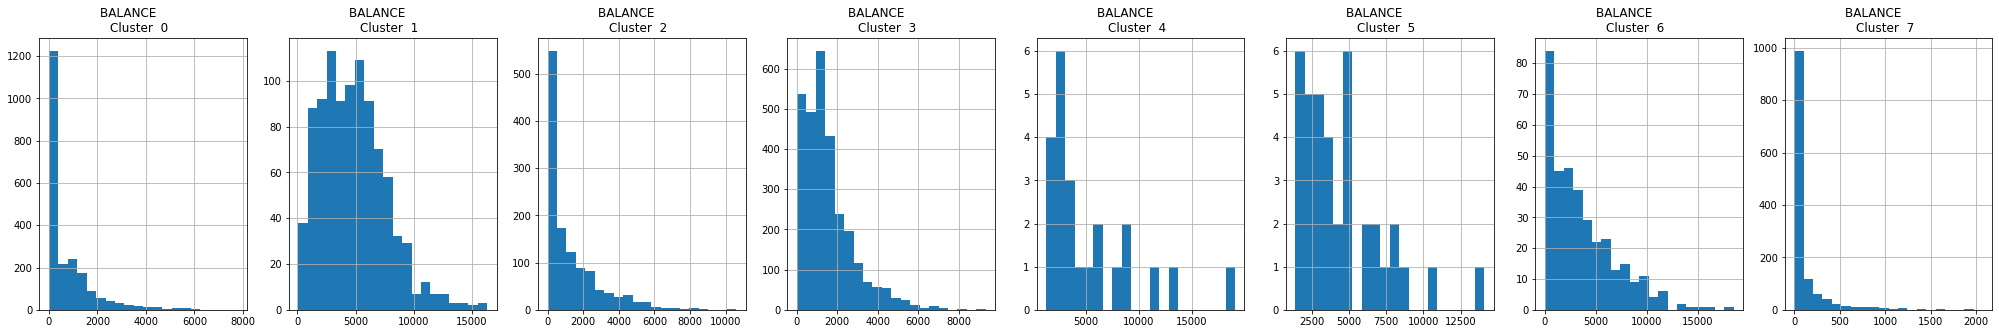

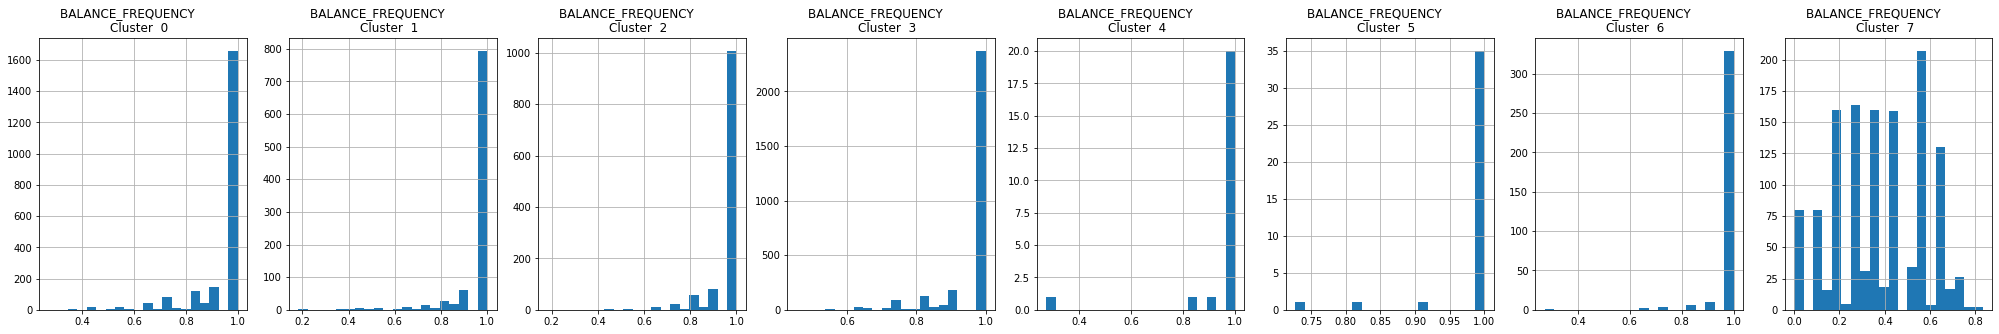

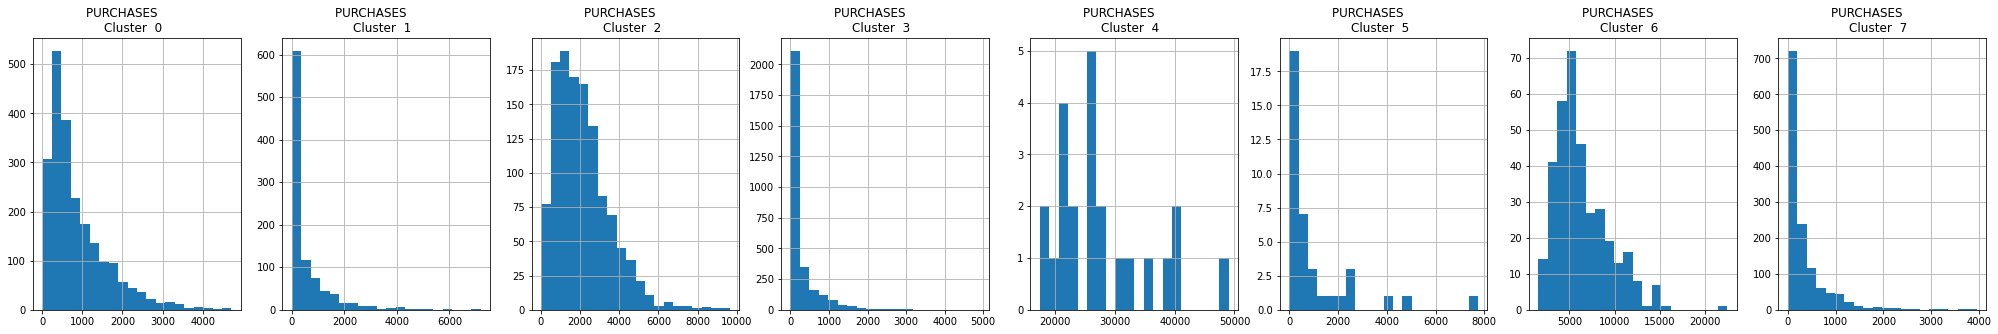

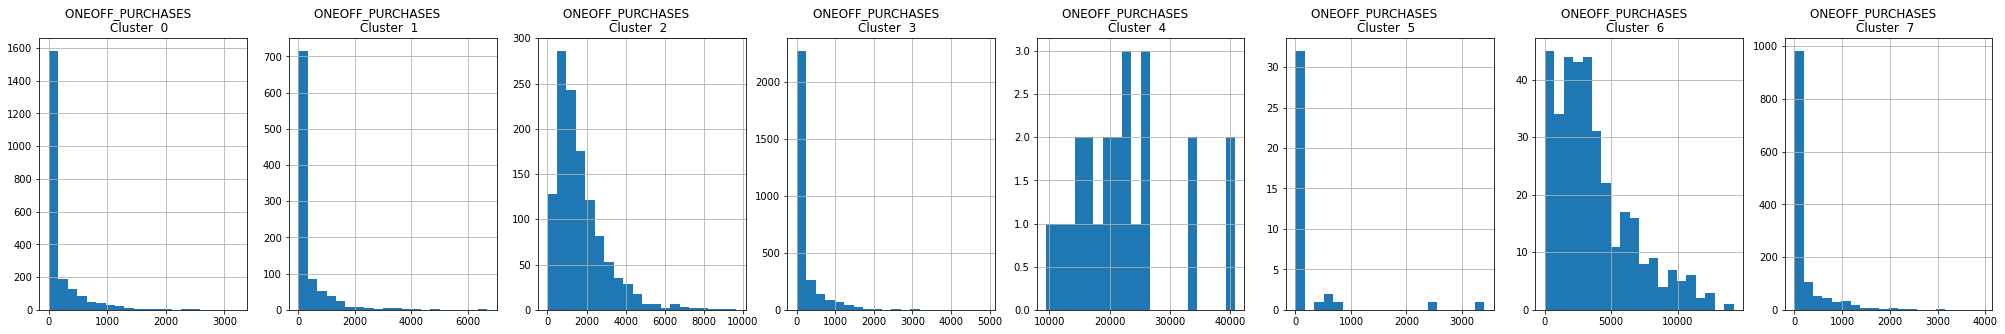

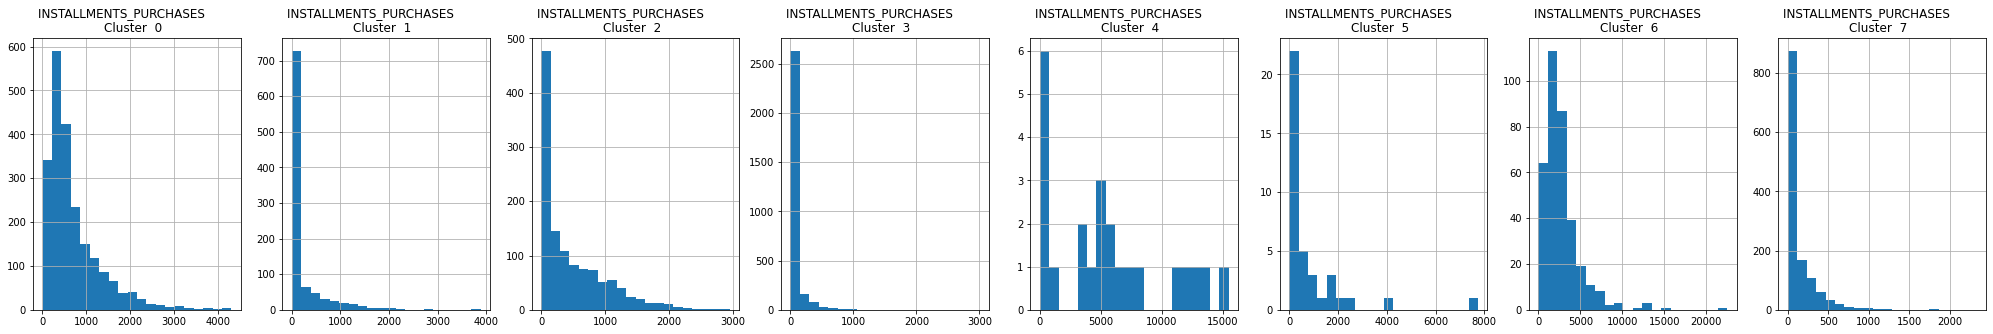

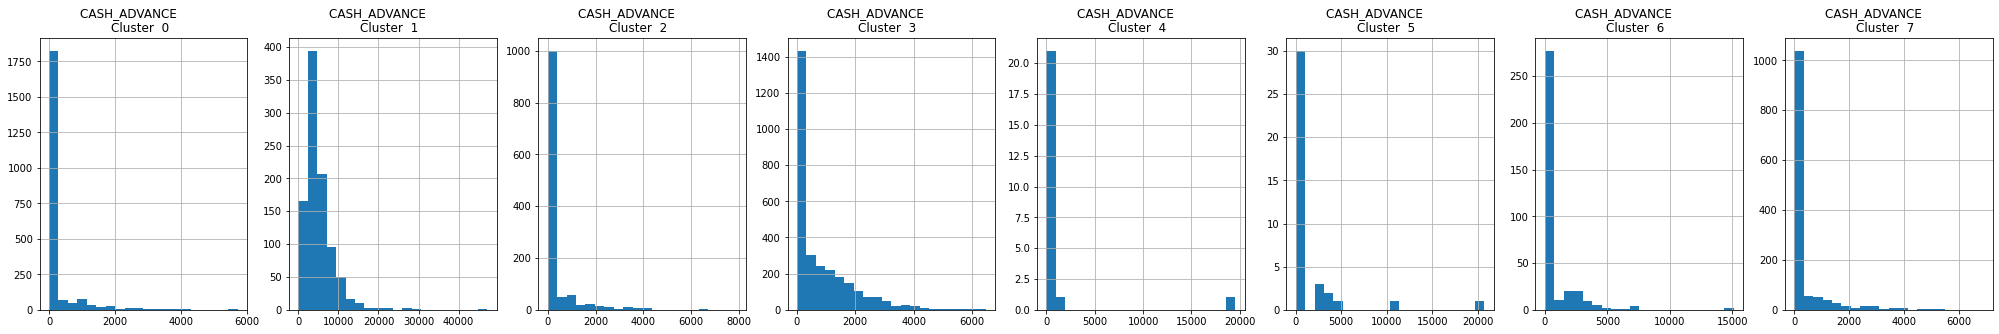

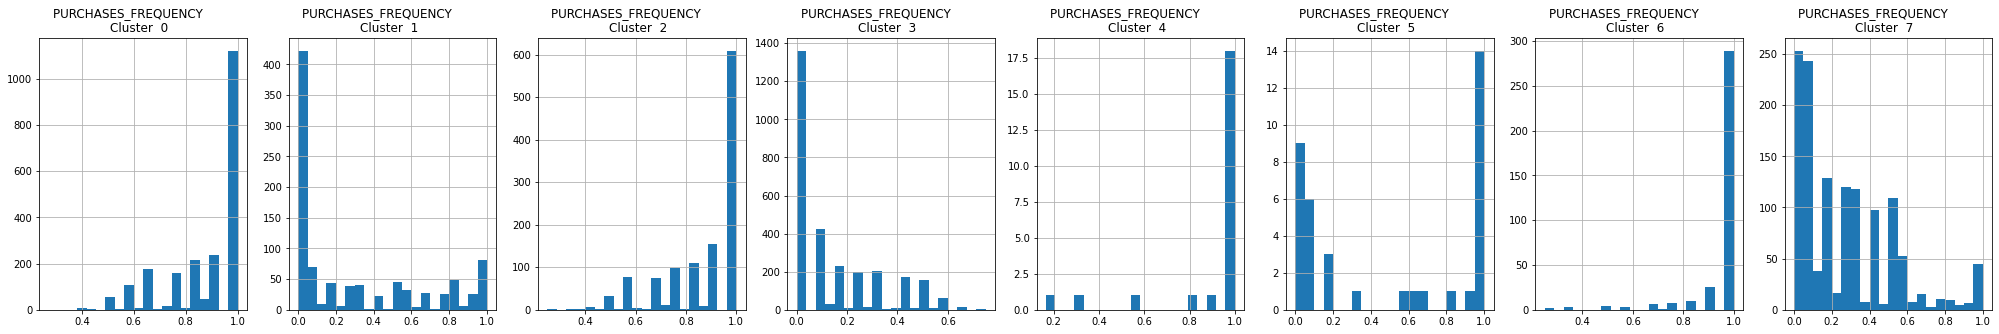

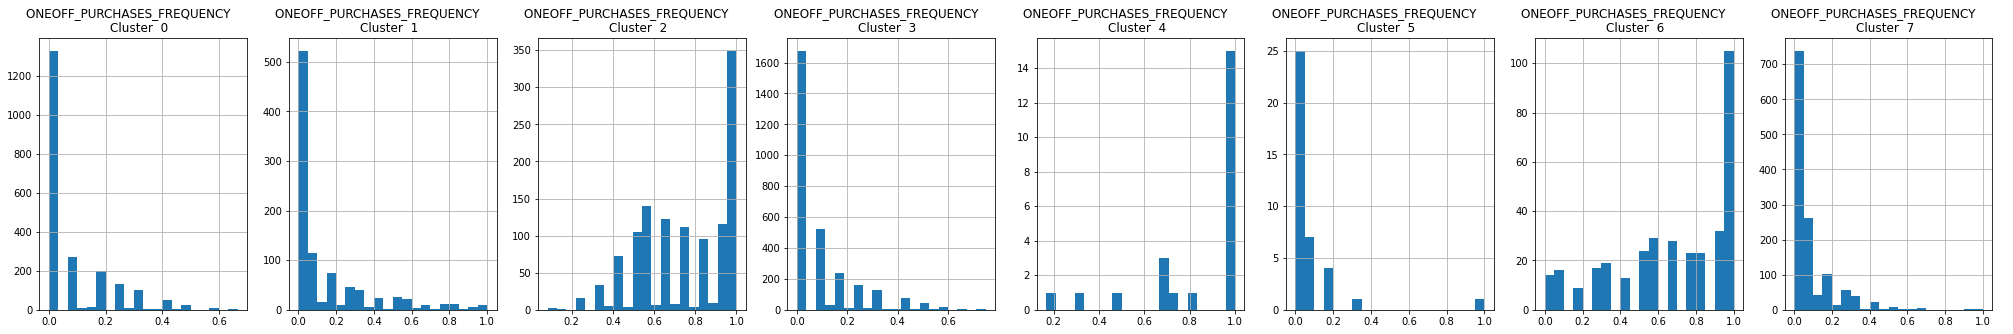

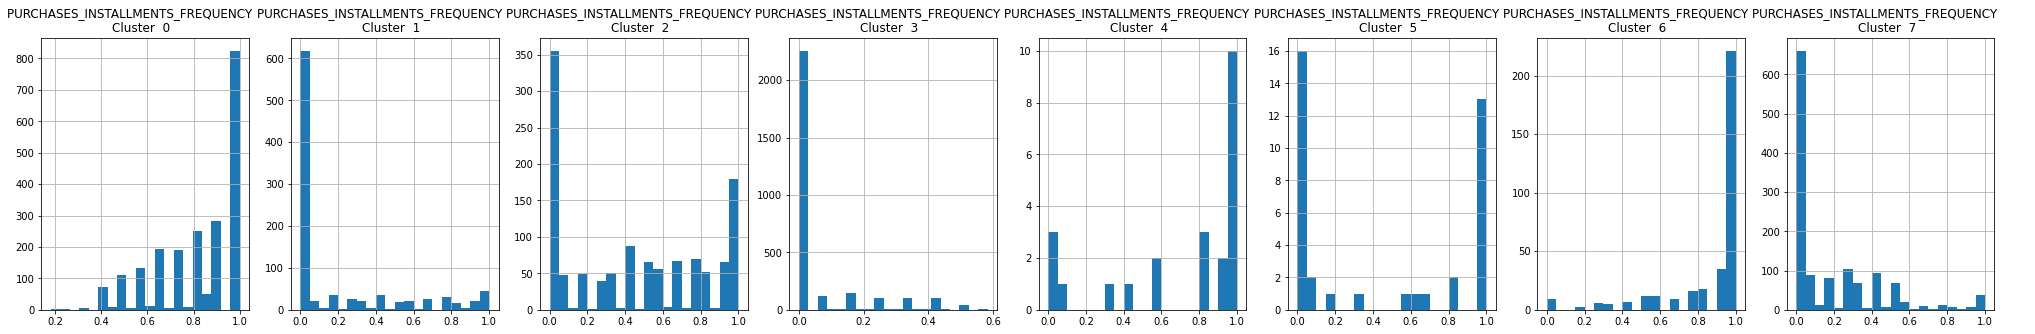

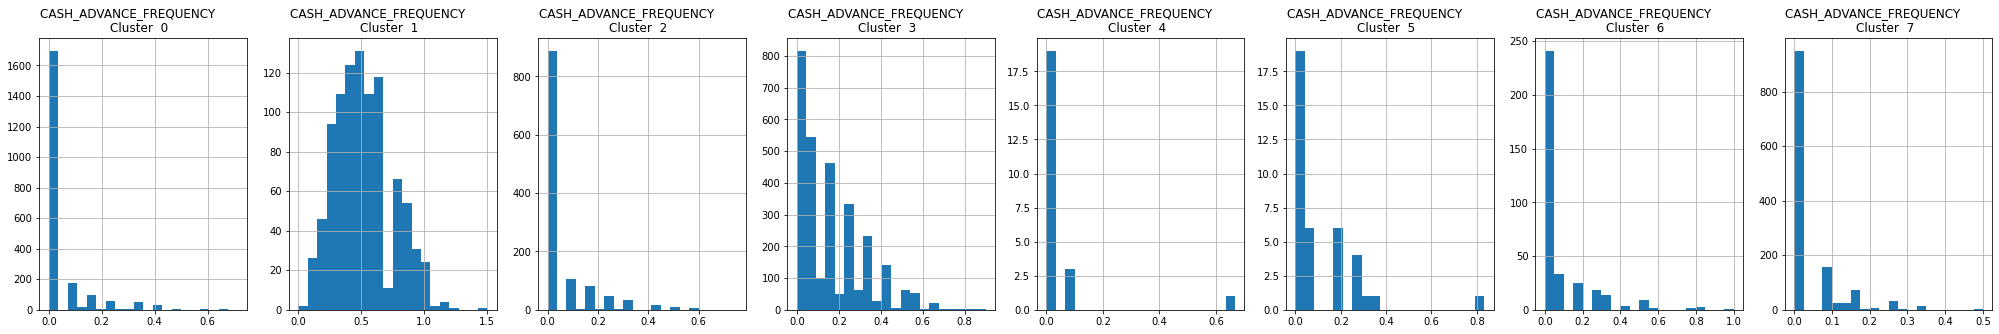

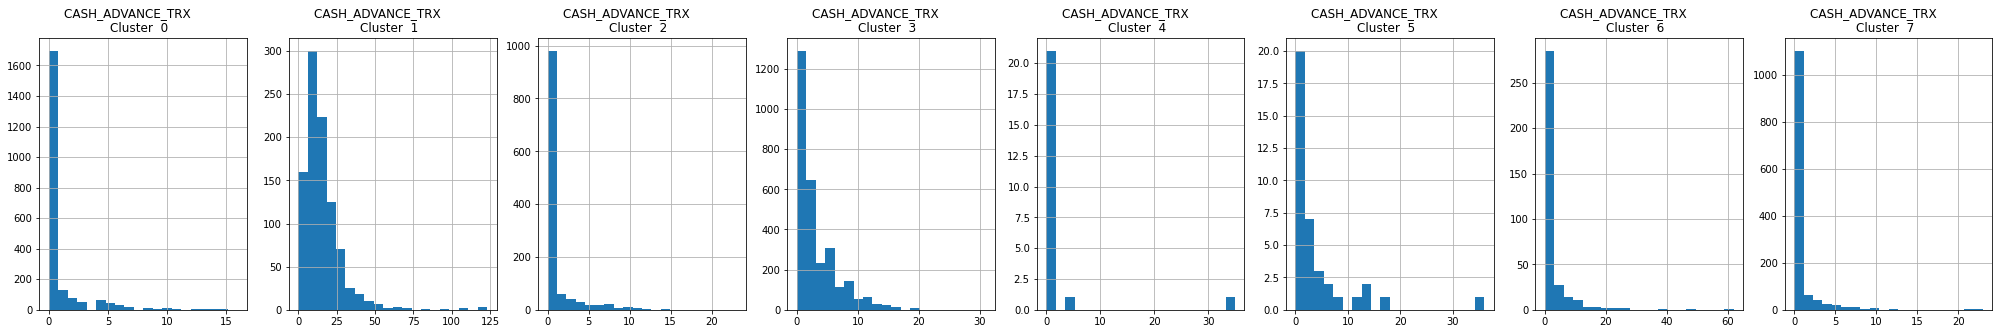

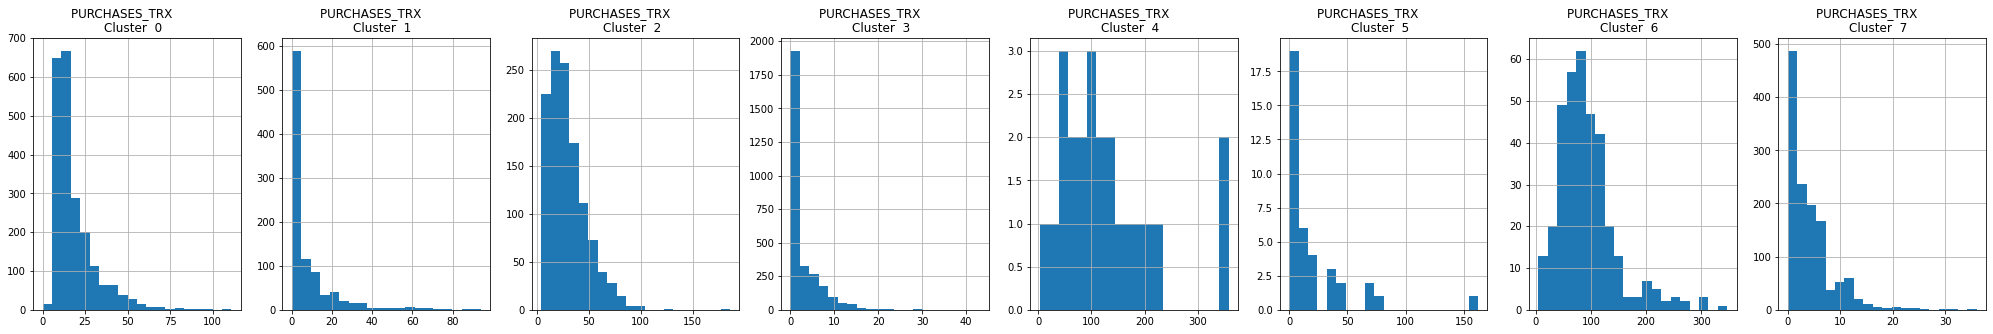

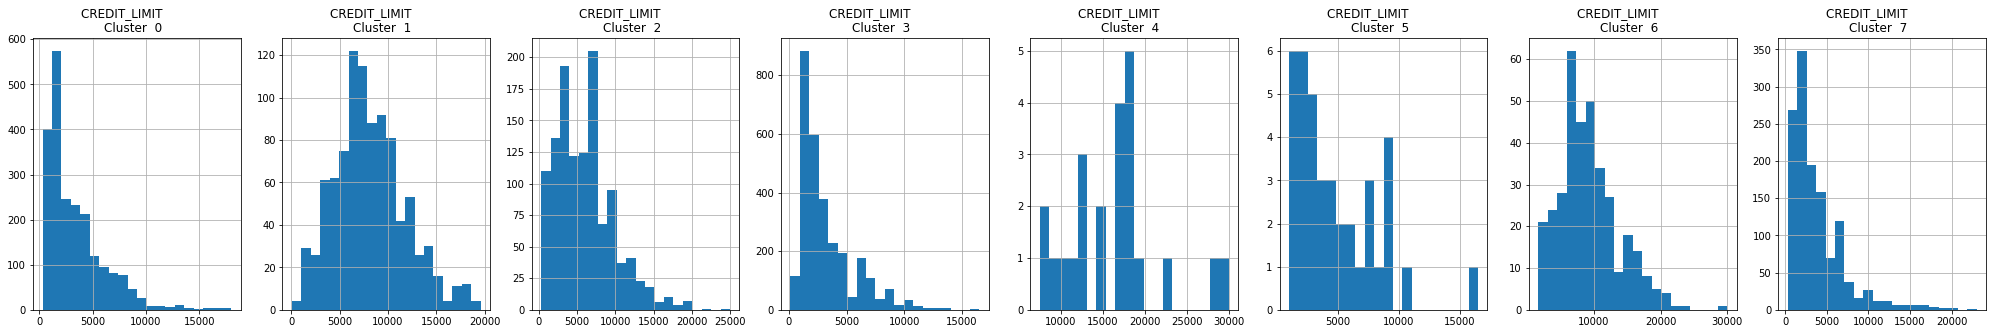

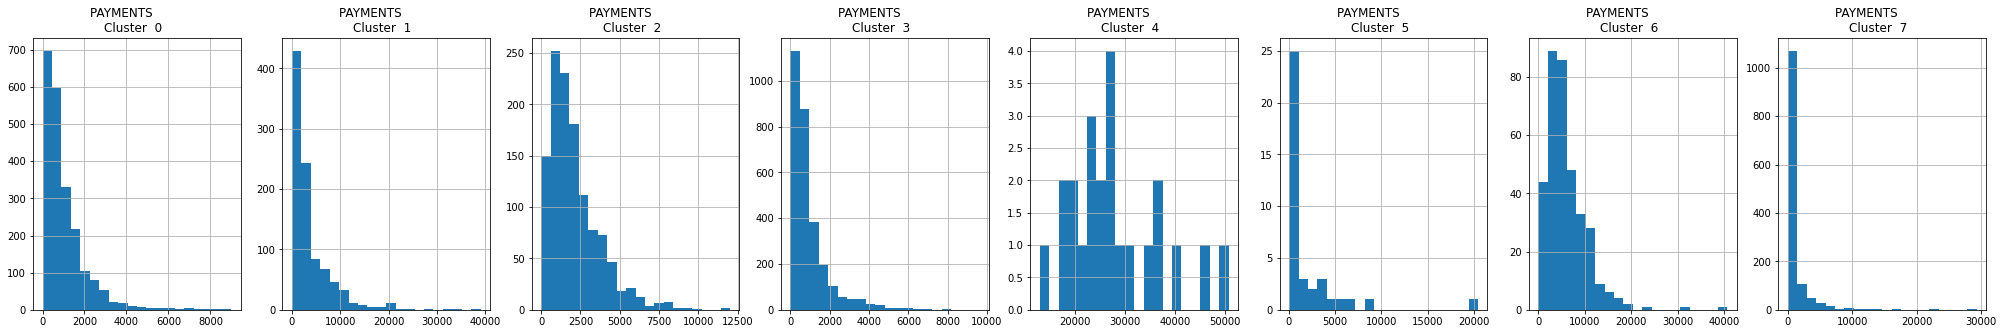

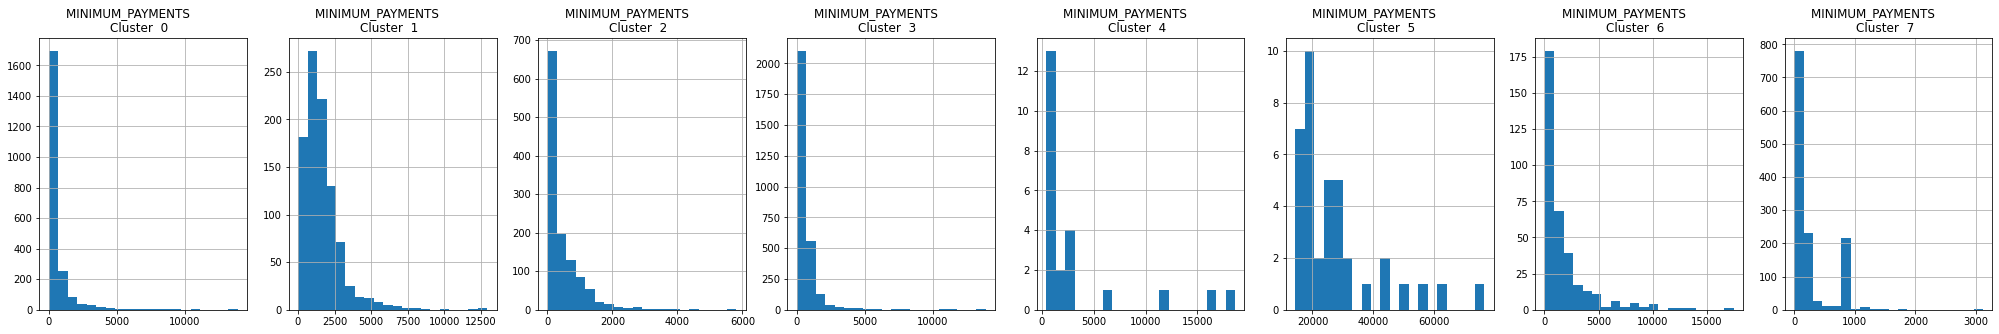

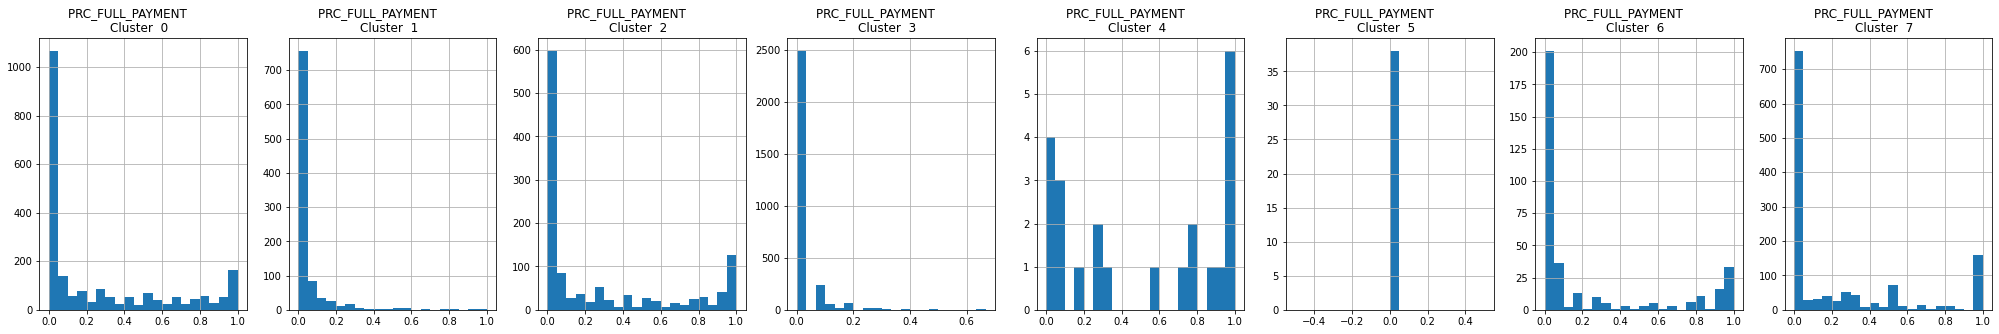

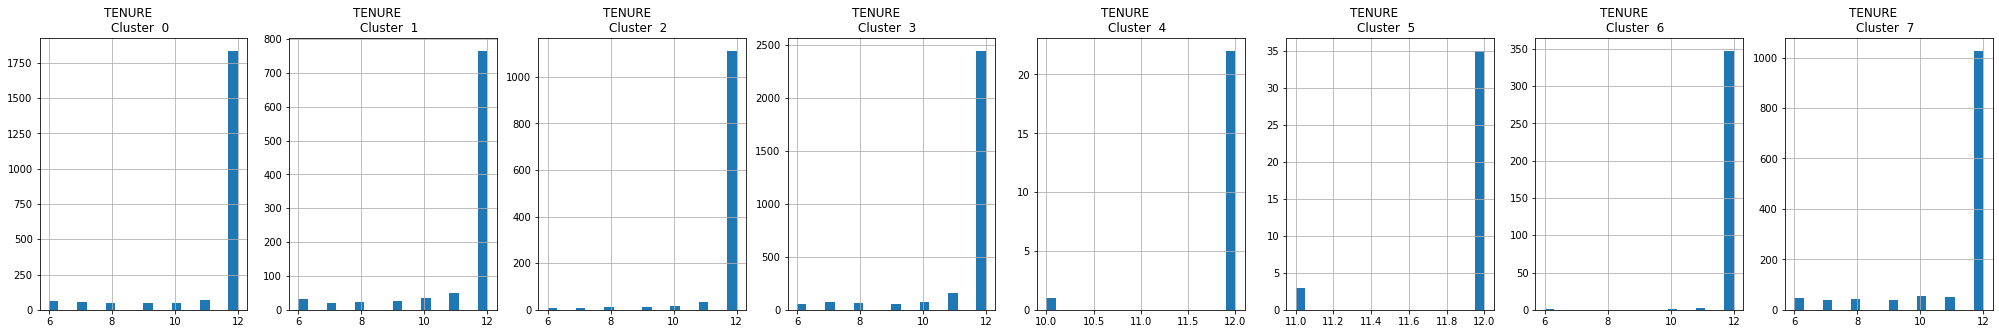

In [36]:
#plot the histogram of various clusters

#this gives us the data preeesent in each cluster for each column

for i in cc_df.columns:
    plt.figure(figsize = (35, 5))
    
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = cc_df_cluster[cc_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}        \nCluster  {}  '.format(i, j))
    plt.show()
    


# Task 8 Apply Principle Component Analysis and visualizing the results

Here we pick only principle features

we create a group of correlated variables

i.e. we check the relations among columns

It reduces dimensionality



In [40]:
pca = PCA(n_components = 2)
pri_comp = pca.fit_transform(cc_df_scaled)
pri_comp

array([[-1.68221952, -1.07645115],
       [-1.13829447,  2.50648071],
       [ 0.96968762, -0.38352841],
       ...,
       [-0.92620336, -1.81078721],
       [-2.33655548, -0.65795983],
       [-0.55642679, -0.40046005]])

In [41]:
#create df of two components


pca_df = pd.DataFrame(data = pri_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138294,2.506481
2,0.969688,-0.383528
3,-0.873625,0.043162
4,-1.599434,-0.688581


In [43]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,3
1,-1.138294,2.506481,1
2,0.969688,-0.383528,2
3,-0.873625,0.043162,3
4,-1.599434,-0.688581,3


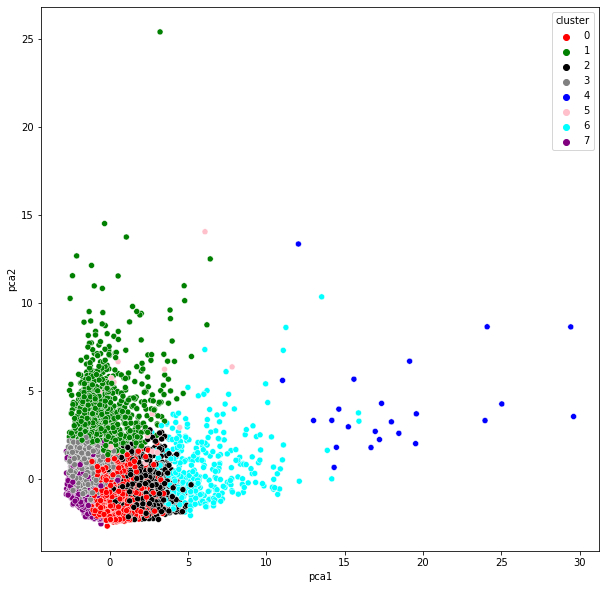

In [49]:
plt.figure(figsize = (10, 10))

ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'black', 'grey', 'blue', 'pink', 'cyan', 'purple'])
plt.show()